In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '98s1MLMBv8ohps-irB64'

In [4]:
# Importing the United Nations World Tourism "Tourism in France" variable.

data = quandl.get('UTOR/TOR_FRA')


In [5]:
data.head()

,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
Date,,,,,,,,
1995-12-31,60033.0,31295.0,27587.0,3708.0,18686.0,20699.0,16358.0,4341.0
1996-12-31,62406.0,32088.0,28352.0,3736.0,18151.0,22049.0,17748.0,4301.0
1997-12-31,66591.0,NaN,27402.0,NaN,17115.0,NaN,17490.0,NaN
1998-12-31,70109.0,NaN,29490.0,NaN,18077.0,NaN,18819.0,NaN
1999-12-31,73147.0,44551.0,37754.0,6797.0,16709.0,31630.0,25204.0,6426.0


In [6]:
data.shape

(24, 8)

In [7]:
data.columns

Index(['Inbound: Arrivals - Thousands (TF)',
       'Inbound: Tourism expenditure in the country - US$ Mn (IMF)',
       'Inbound: Travel - US$ Mn (IMF)',
       'Inbound: Passenger transport - US$ Mn (IMF)',
       'Outbound: Departures - Thousands (TF)',
       'Outbound: Tourism expenditure in other countries - US$ Mn (IMF)',
       'Outbound: Travel - US$ Mn (IMF)',
       'Outbound: Passenger transport - US$ Mn (IMF)'],
      dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

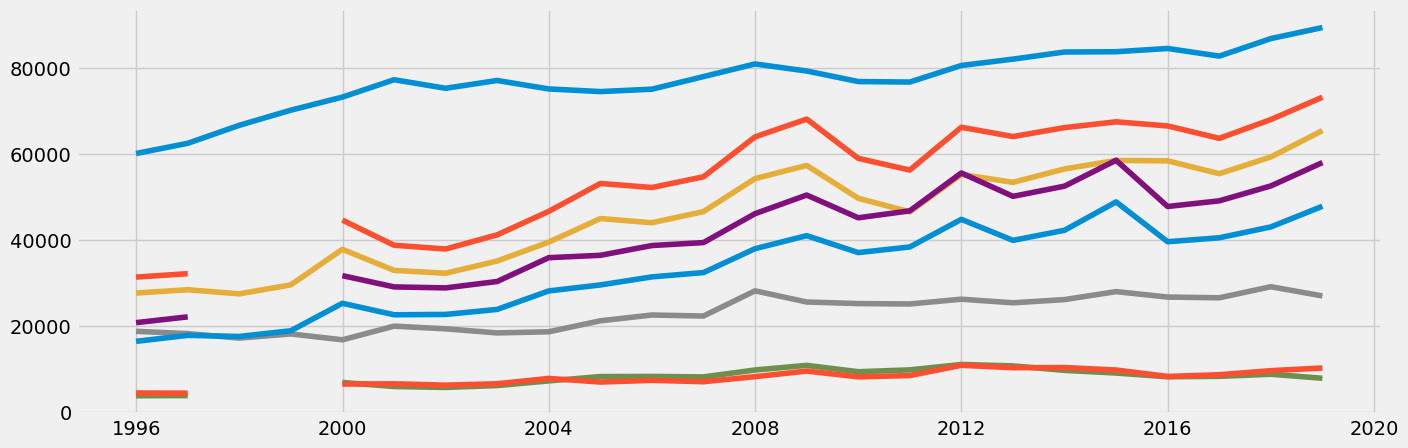

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 3. Make a subset of the data. Filter pre-2000 data.

I removed the data prior to 2000 because there were gaps 1997-2000 for most of the data.

In [34]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [35]:
data_2.head()

,Date,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
0,1995-12-31,60033.0,31295.0,27587.0,3708.0,18686.0,20699.0,16358.0,4341.0
1,1996-12-31,62406.0,32088.0,28352.0,3736.0,18151.0,22049.0,17748.0,4301.0
2,1997-12-31,66591.0,NaN,27402.0,NaN,17115.0,NaN,17490.0,NaN
3,1998-12-31,70109.0,NaN,29490.0,NaN,18077.0,NaN,18819.0,NaN
4,1999-12-31,73147.0,44551.0,37754.0,6797.0,16709.0,31630.0,25204.0,6426.0


In [36]:
data_sub = data_2.loc[(data_2['Date'] >= '1999-01-01') & (data_2['Date'] < '2020-06-01')]

In [37]:
data_sub.shape

(20, 9)

In [38]:
data_sub.head()

,Date,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
4,1999-12-31,73147.0,44551.0,37754.0,6797.0,16709.0,31630.0,25204.0,6426.0
5,2000-12-31,77190.0,38706.0,32857.0,5849.0,19886.0,29016.0,22537.0,6479.0
6,2001-12-31,75202.0,37826.0,32188.0,5638.0,19265.0,28781.0,22611.0,6170.0
7,2002-12-31,77012.0,41113.0,35036.0,6077.0,18315.0,30270.0,23779.0,6491.0
8,2003-12-31,75048.0,46576.0,39421.0,7155.0,18576.0,35807.0,28075.0,7732.0


In [39]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Inbound: Arrivals - Thousands (TF),Inbound: Tourism expenditure in the country - US$ Mn (IMF),Inbound: Travel - US$ Mn (IMF),Inbound: Passenger transport - US$ Mn (IMF),Outbound: Departures - Thousands (TF),Outbound: Tourism expenditure in other countries - US$ Mn (IMF),Outbound: Travel - US$ Mn (IMF),Outbound: Passenger transport - US$ Mn (IMF)
datetime,,,,,,,,
1999-12-31,73147.0,44551.0,37754.0,6797.0,16709.0,31630.0,25204.0,6426.0
2000-12-31,77190.0,38706.0,32857.0,5849.0,19886.0,29016.0,22537.0,6479.0
2001-12-31,75202.0,37826.0,32188.0,5638.0,19265.0,28781.0,22611.0,6170.0
2002-12-31,77012.0,41113.0,35036.0,6077.0,18315.0,30270.0,23779.0,6491.0
2003-12-31,75048.0,46576.0,39421.0,7155.0,18576.0,35807.0,28075.0,7732.0


In [46]:
del data_sub['Inbound: Passenger transport - US$ Mn (IMF)']
del data_sub['Inbound: Tourism expenditure in the country - US$ Mn (IMF)']
del data_sub['Inbound: Travel - US$ Mn (IMF)']
del data_sub['Outbound: Departures - Thousands (TF)']
del data_sub['Outbound: Tourism expenditure in other countries - US$ Mn (IMF)']
del data_sub['Outbound: Travel - US$ Mn (IMF)']
del data_sub['Outbound: Passenger transport - US$ Mn (IMF)']

### 4. Create a line chart of the data

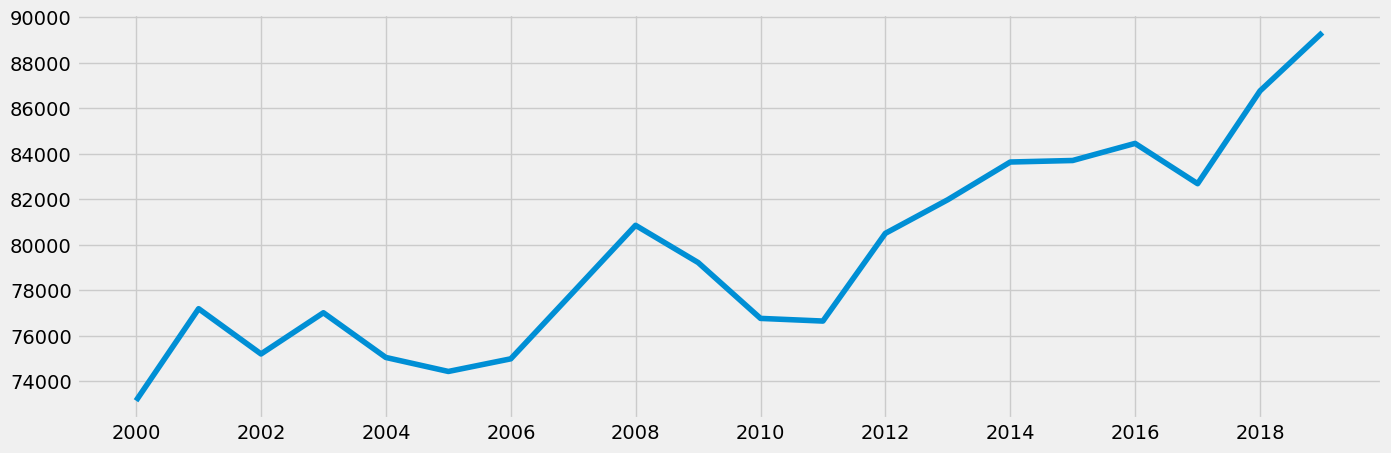

In [47]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [48]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Inbound: Arrivals - Thousands (TF)    0
dtype: int64

In [49]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 5. Time-series analysis: decomposition

In [56]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [57]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

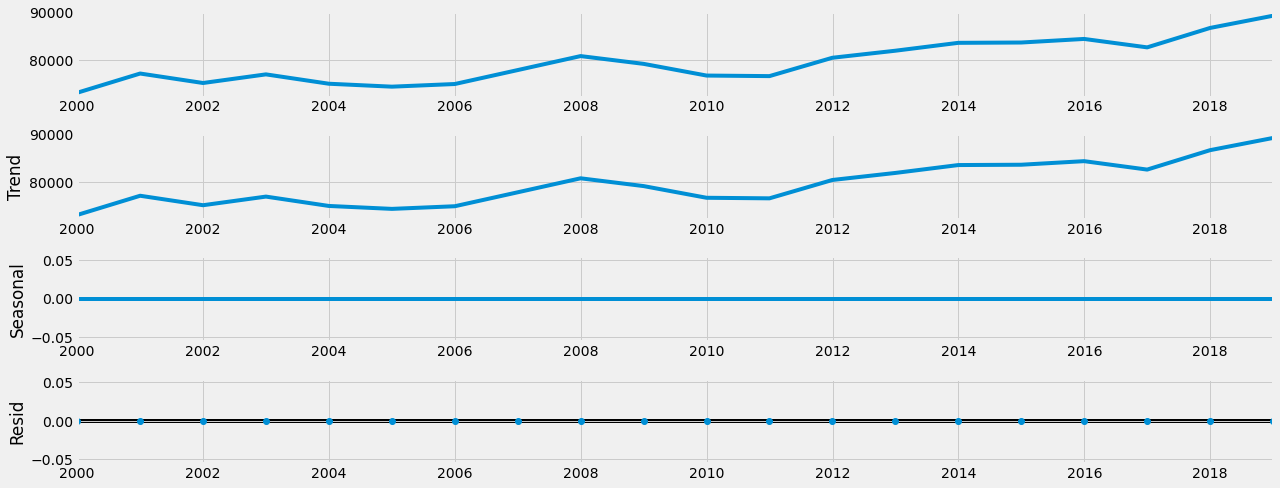

In [58]:
# Plot the separate components

decomposition.plot()
plt.show()

There is no seasonality shown in the chart, but that is because the data is reported on a yearly basis. If the data was shown by day, week, or month you would see seasonality in the trend.

The chart shows no residual marks. I believe that is likely due to the granularity of the data again.

### 6. Conduct a Dickey-Fuller test to check for stationarity

In [61]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Inbound: Arrivals - Thousands (TF)'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.953731
p-value                         1.000000
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


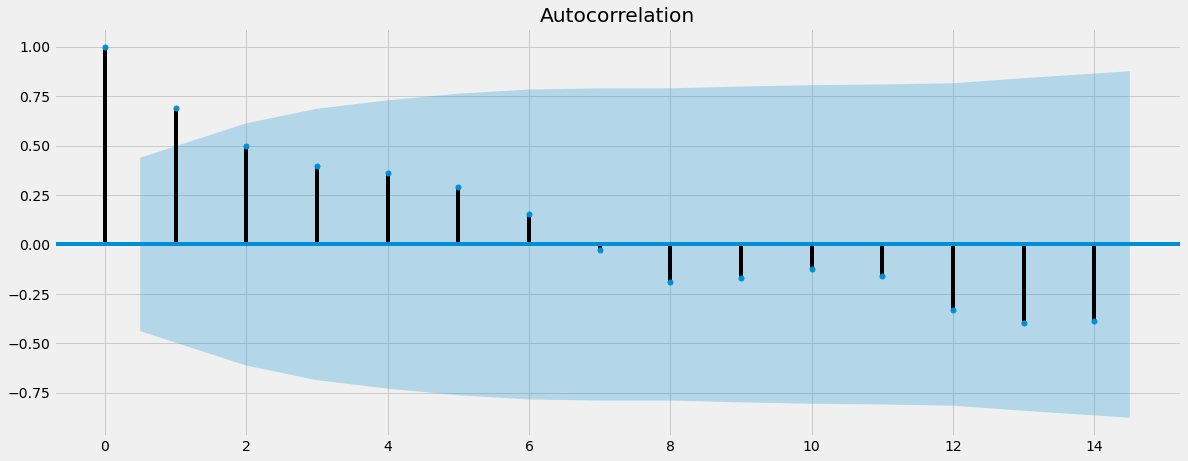

In [62]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

The null hypothesis is that there is a unit root (i.e. my data is stationary).

The p-value is 1 - meaning that is is not significant.

Since the test statistic is larger than the critical value I can't reject the null hypothesis.

There is a unit root and therefore my data is non-stationary.

### 7. Stationarizing the data

In [63]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [64]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [65]:
data_diff.head()

,Inbound: Arrivals - Thousands (TF)
datetime,
2000-12-31,4043.0
2001-12-31,-1988.0
2002-12-31,1810.0
2003-12-31,-1964.0
2004-12-31,-615.0


In [66]:
data_diff.columns

Index(['Inbound: Arrivals - Thousands (TF)'], dtype='object')

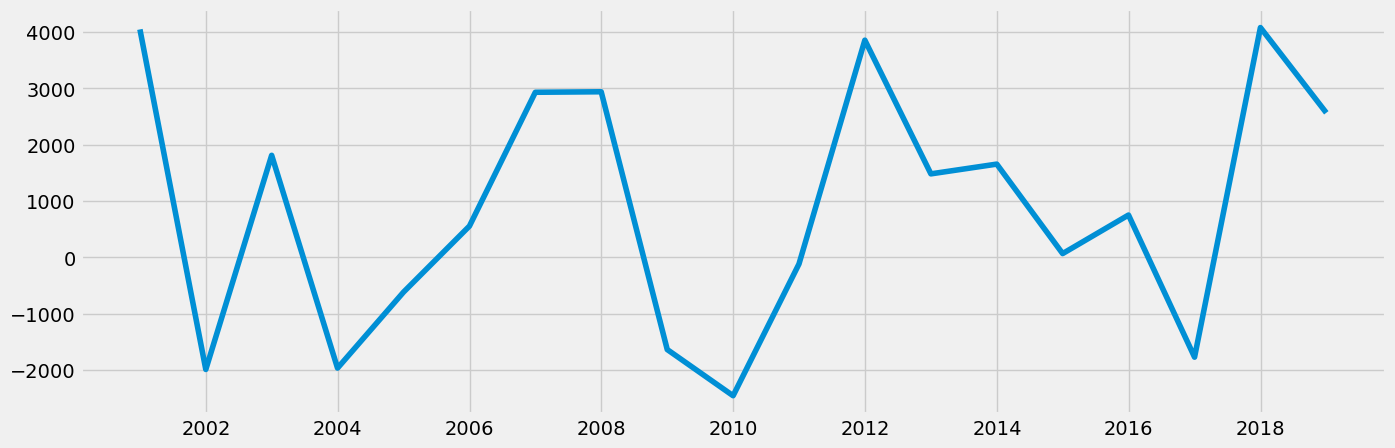

In [67]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [68]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.797277
p-value                         0.991592
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


### 9. Check your data's autocorrelations

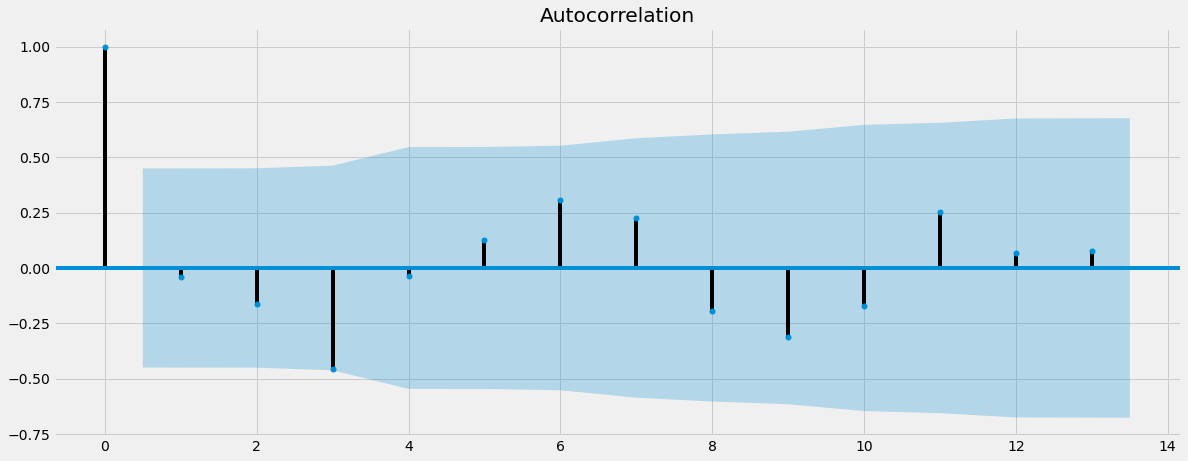

In [69]:
plot_acf(data_diff)
plt.show()